## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Setting matplotlib parameters for plotting

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIG_SIZE = 16
LARGE_SIZE = 20

params = {
    'figure.figsize': (16, 8),
    'font.size': SMALL_SIZE,
    'xtick.labelsize': MEDIUM_SIZE,
    'ytick.labelsize': MEDIUM_SIZE,
    'legend.fontsize': BIG_SIZE,
    'figure.titlesize': LARGE_SIZE,
    'axes.titlesize': MEDIUM_SIZE,
    'axes.labelsize': BIG_SIZE
}
plt.rcParams.update(params)

## Loading the CIFAR10 data

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

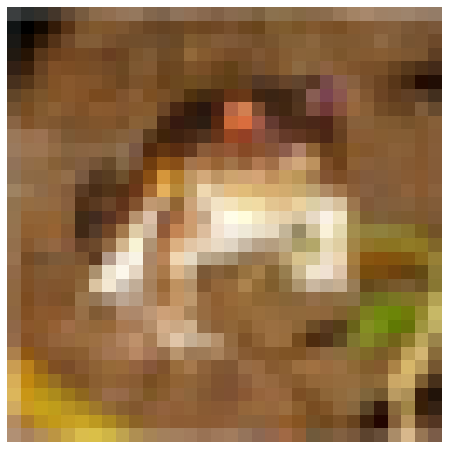

In [4]:
plt.imshow(x_train[0])
plt.axis('off')
plt.show()

In [5]:
labels = {0: 'airplane',
1: 'automobile',
2: 'bird',
3: 'cat',
4: 'deer',
5: 'dog',
6: 'frog',
7: 'horse',
8: 'ship',
9: 'truck'}

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
# Scaling the data 

x_train = x_train/255.0
x_test = x_test/255.0

## Training ANN model

In [8]:
# Model definition

ann_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (32, 32, 3)),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [9]:
ann_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 128)               1

In [11]:
# Training the model

ann_history = ann_model.fit(x_train, y_train, epochs = 30, batch_size = 5000, verbose = 0)

In [12]:
# Testing the model on testing data

ann_model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.6890 - accuracy: 0.4151


[1.6890265941619873, 0.41510000824928284]

## Exploring the results of ANN model

In [13]:
ann_df = pd.DataFrame(ann_history.history)

In [14]:
ann_df.head()

,loss,accuracy
0,2.174387,0.26658
1,1.760425,0.37734
2,1.630256,0.42290
3,1.550729,0.45216
4,1.487409,0.47554


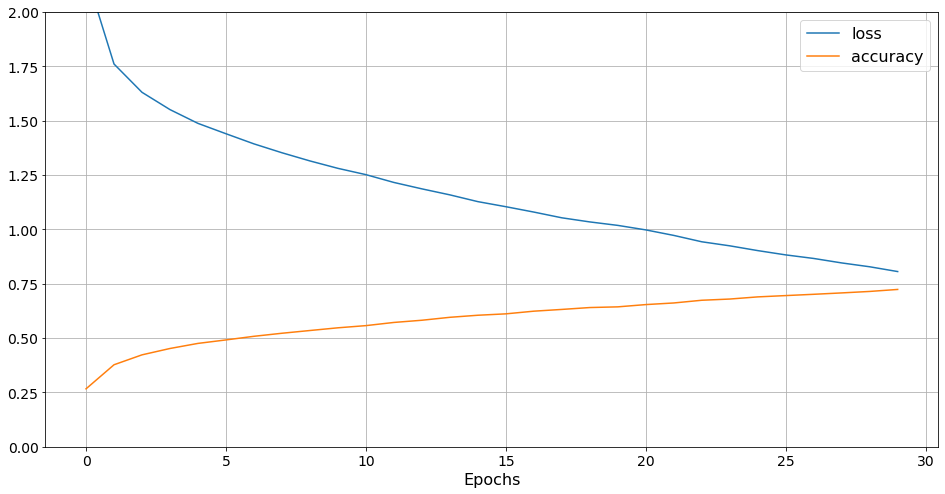

In [15]:
ann_df.plot()
plt.ylim(bottom = 0, top = 2)
plt.xlabel('Epochs')
plt.grid()
plt.show()

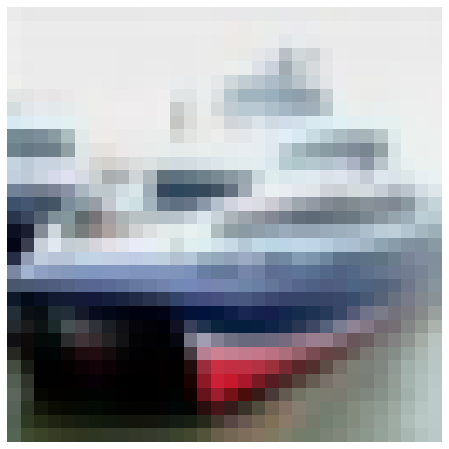

ship


In [16]:
plt.imshow(x_test[1])
plt.axis('off')
plt.show()
print(labels.get(y_test[1][0]))

In [17]:
ann_predictions = ann_model.predict(x_test)

In [18]:
print(labels[np.argmax(ann_predictions[1])])

ship


In [19]:
def ann_predict(img_index):
  print("True label:", labels[y_test[img_index][0]])
  print("ANN Predictions:", labels[np.argmax(ann_predictions[img_index])])

In [20]:
ann_predict(13)

True label: horse
ANN Predictions: horse


In [21]:
np.argmax(ann_predictions, axis = -1)

array([3, 8, 0, ..., 5, 5, 5])

In [22]:
print("Classification report: \n")
print(classification_report(y_test, np.argmax(ann_predictions, axis = -1)))

Classification report: 

              precision    recall  f1-score   support

           0       0.57      0.41      0.48      1000
           1       0.54      0.63      0.58      1000
           2       0.34      0.31      0.32      1000
           3       0.28      0.32      0.30      1000
           4       0.37      0.37      0.37      1000
           5       0.25      0.58      0.35      1000
           6       0.50      0.40      0.44      1000
           7       0.59      0.40      0.47      1000
           8       0.58      0.48      0.52      1000
           9       0.66      0.25      0.37      1000

    accuracy                           0.42     10000
   macro avg       0.47      0.42      0.42     10000
weighted avg       0.47      0.42      0.42     10000



In [23]:
list(labels.values())

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

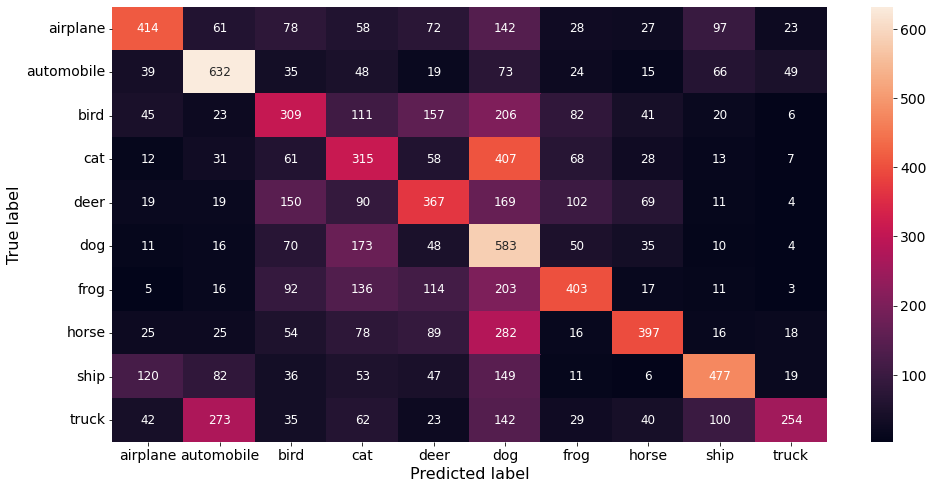

In [24]:
cm = confusion_matrix(y_test, np.argmax(ann_predictions, axis = -1))
sns.heatmap(cm, annot = True, fmt = ".0f", xticklabels = list(labels.values()), yticklabels = list(labels.values()))
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

## Training CNN model

In [25]:
cnn_model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation = 'relu'),
      tf.keras.layers.Dense(10, activation = 'softmax')
])

In [26]:
cnn_model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [27]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [28]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [29]:
y_train = y_train.reshape(-1,)

In [30]:
cnn_history = cnn_model.fit(x_train, y_train, epochs = 30, verbose = 0)

In [31]:
cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3444 - accuracy: 0.6712


[2.3444201946258545, 0.6711999773979187]

## Exploring the results of CNN model

In [32]:
cnn_df = pd.DataFrame(cnn_history.history)

In [33]:
cnn_df.head()

,loss,accuracy
0,1.454255,0.48060
1,1.117415,0.60458
2,0.984667,0.65524
3,0.890773,0.68760
4,0.820174,0.71372


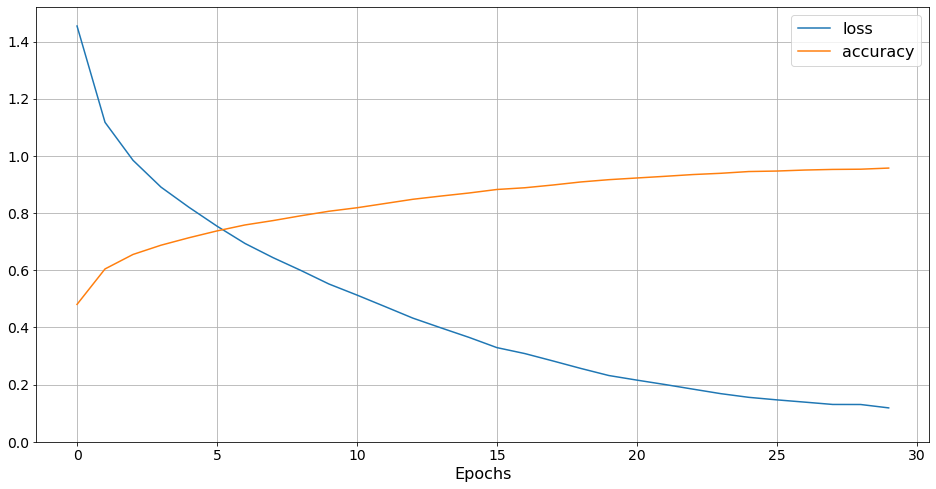

In [34]:
cnn_df.plot()
plt.ylim(bottom = 0)
plt.xlabel('Epochs')
plt.grid()
plt.show()

In [35]:
cnn_predictions = cnn_model.predict(x_test)

In [36]:
def cnn_predict(img_index):
  print("True label:", labels[y_test[img_index][0]])
  print("CNN Predictions:", labels[np.argmax(cnn_predictions[img_index])])

In [37]:
cnn_predict(10)

True label: airplane
CNN Predictions: airplane


In [38]:
print("Classification report: \n")
print(classification_report(y_test, np.argmax(cnn_predictions, axis = -1)))

Classification report: 

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1000
           1       0.81      0.77      0.79      1000
           2       0.56      0.57      0.57      1000
           3       0.47      0.48      0.47      1000
           4       0.62      0.58      0.60      1000
           5       0.57      0.55      0.56      1000
           6       0.73      0.77      0.75      1000
           7       0.78      0.68      0.73      1000
           8       0.77      0.79      0.78      1000
           9       0.74      0.79      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



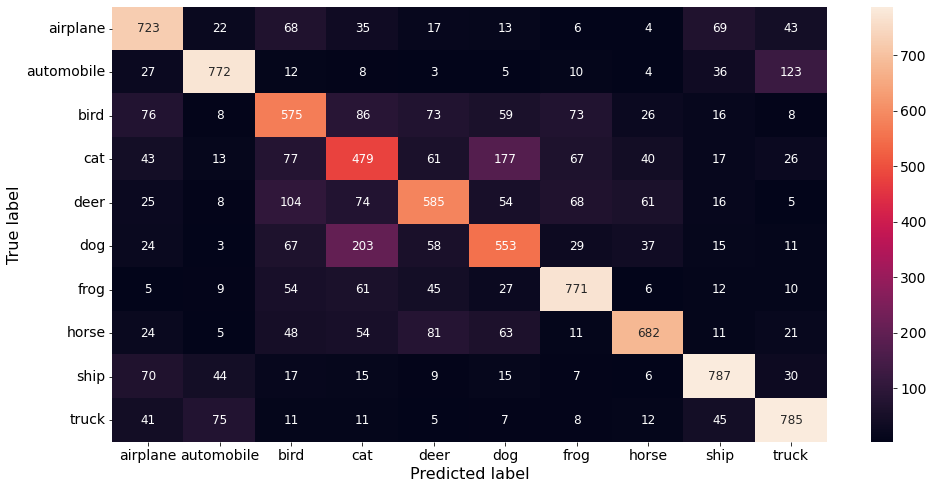

In [39]:
cm = confusion_matrix(y_test, np.argmax(cnn_predictions, axis = -1))
sns.heatmap(cm, annot = True, fmt = ".0f", xticklabels = list(labels.values()), yticklabels = list(labels.values()))
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

## Comparison of performance of ANN and CNN model

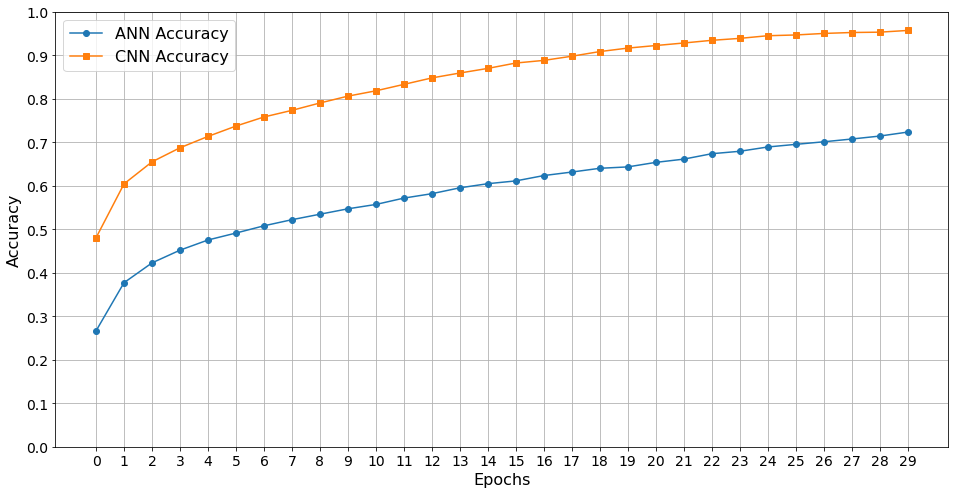

In [40]:
plt.plot(ann_df['accuracy'], marker = 'o',label = 'ANN Accuracy')
plt.plot(cnn_df['accuracy'], marker = 's',label = 'CNN Accuracy')
plt.xticks(range(30))
plt.yticks([0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.ylim(bottom = 0, top = 1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='best')
plt.show()